Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.Z1XSYV_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


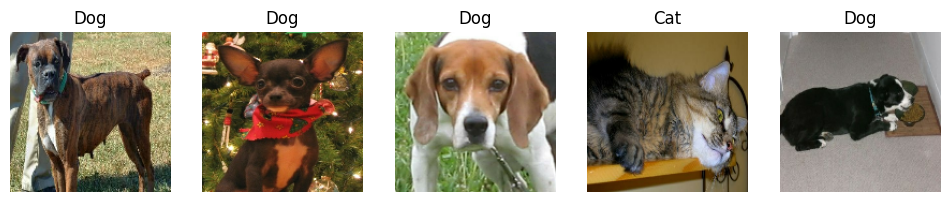

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 47s 68ms/step - accuracy: 0.5827 - loss: 0.7253 - val_accuracy: 0.7036 - val_loss: 0.5903
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.7004 - loss: 0.5795 - val_accuracy: 0.7511 - val_loss: 0.5183
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 57ms/step - accuracy: 0.7684 - loss: 0.4869 - val_accuracy: 0.7926 - val_loss: 0.4464
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.8109 - loss: 0.4083 - val_accuracy: 0.8016 - val_loss: 0.4586
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.8574 - loss: 0.3243 - val_accuracy: 0.8067 - val_loss: 0.5017
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.8995 - loss: 0.2397 - val_accuracy: 0.8173 - val_loss: 0.5187
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.9354 - loss: 0.1634 - val_accuracy: 0.8076 - val_loss: 0.6255
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9588 - loss: 0.1100 - 

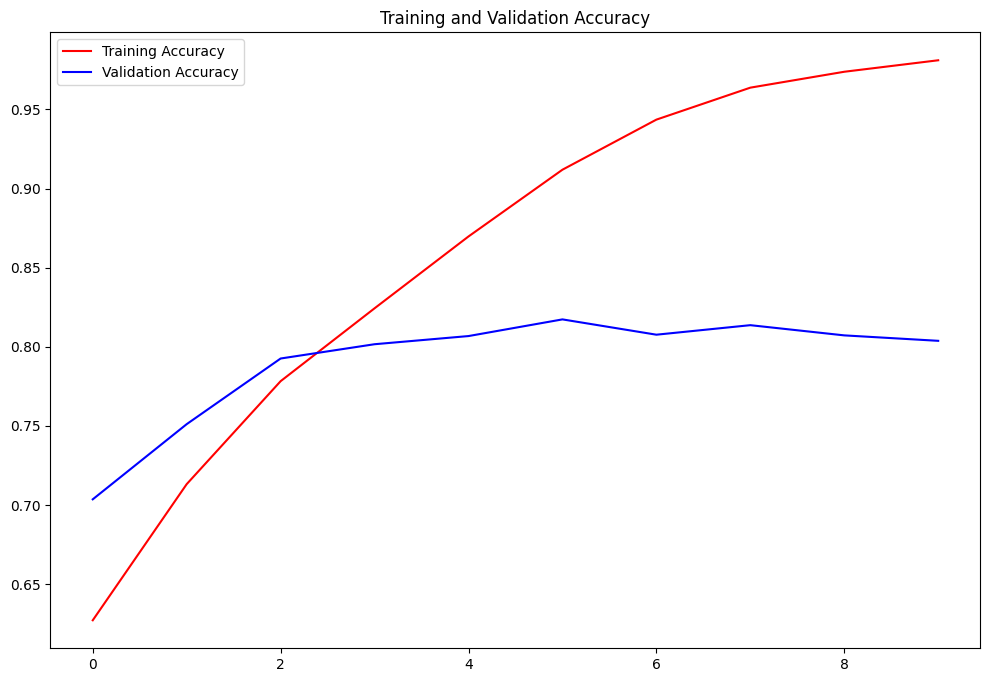

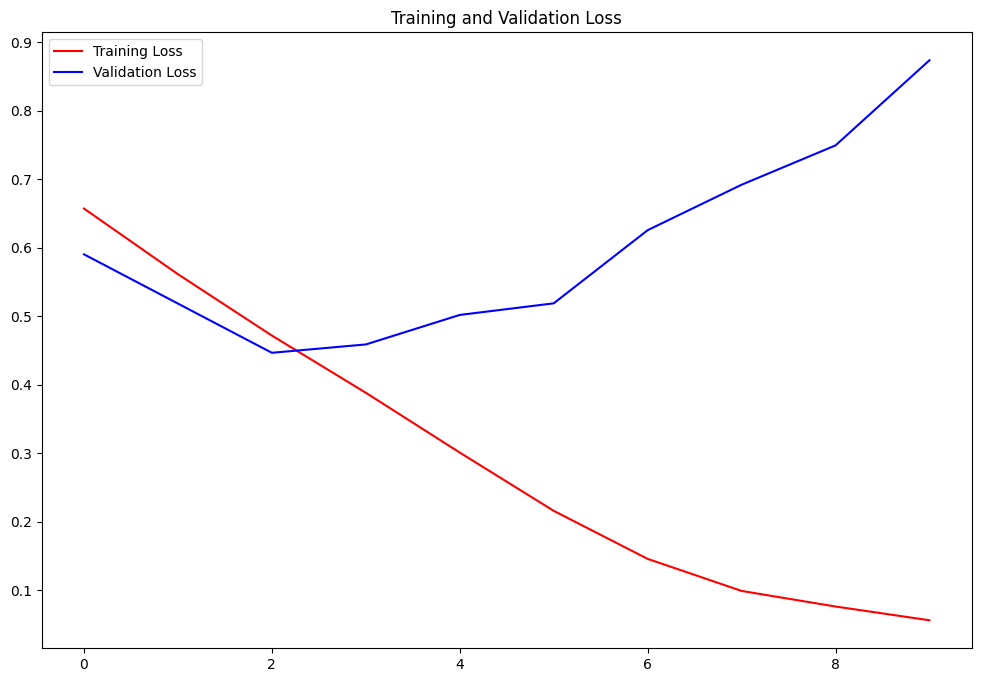

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


dataset_name = 'cats_vs_dogs'
(data_train, data_test), dataset_info = tfds.load(
    dataset_name,
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,  # Include labels
    with_info=True  # Include dataset info
)

IMG_SIZE = 150

def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize pixel values
    return image, label

train_dataset = data_train.map(preprocess_image).shuffle(1000).batch(32).prefetch(1)
test_dataset = data_test.map(preprocess_image).batch(32).prefetch(1)


def plot_samples(dataset, n_samples=5):
    plt.figure(figsize=(12, 8))
    for i, (image, label) in enumerate(dataset.take(n_samples)):
        ax = plt.subplot(1, n_samples, i + 1)
        plt.imshow(image.numpy())
        plt.title('Cat' if label.numpy() == 0 else 'Dog')
        plt.axis('off')
    plt.show()

plot_samples(data_train.map(preprocess_image))


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10
)


loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.2f}")


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
